# DSCI 632 Final Project: `Stock Prediction through Sentiment Analyses of Apple Stock News and Linear Regression Model`


`**Introduction to the Project Study:**`

The study aims to leverage the Yahoo Apple Stock dataset to gain insights into stock market behavior and improve the predictive capabilities. This project draws upon the knowledge acquired during Applied Cloud Computing, Data Analysis and Interpretation, and Applied Machine Learning courses.

The primary objective is to predict the closing price of Apple stock, as recorded by Yahoo Finance, by taking into account various factors, including news and opinions(Which contains Title and Content) sentiment analysis. Factors such as political events, international economic conditions, unforeseen incidents, and a company's financial performance play crucial roles in influencing stock market trends. By incorporating sentiment analysis of news/opinion data, it aims to capture these influences and enhance the stock price predictions.

The Yahoo Apple Stock dataset from the Kaggle source appears to require minimal preprocessing based on initial observations. However, to ensure its cleanliness by checking for missing and duplicate values and applying appropriate imputation methods where necessary. The exploratory data analysis will involve quantitative statistical methods, including mean, standard deviation, correlation matrices, and distribution analysis. Also, visualisuation of the distribution of stock prices over time using Matplotlib will be implemented.

To address the sentiment analysis aspect of the project, the LSTM (Long Short-Term Memory) model of neural networks is going to be implemented. The 'news' and 'opinion' category features which has title and content columns  will be the focal points of our sentiment analysis.

Initially, the conduction of sentiment analysis using traditional methods were done. Still, since PySpark does not support LSTM models, the study was forced to transition to using Python Pandas and opted for the Linear Regression model to predict Apple's stock's closing price. This prediction is based on sentimental analysis of news/opinion-content and titles, as well as other relevant price columns, using a 7-day rolling mean.



### Setup

The whole study is aimed to be implemented using the PySpark. Therefore, Installing Spark version 3.0.1 from the Apache homepage is considered as the primary crucial step.


In [138]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

The next step in the PySpark set up is to set the environmental variables.

In [139]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [140]:
!python -m pip install --upgrade pyspark==2.4.0
!python -m pip install -q findspark

In [141]:
#Install PySpark
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq


Sets up the necessary environment variables and configurations for the Python script to interact with Spark.

In [142]:
import findspark
findspark.init()

### Start Spark Session
Here `SparkSession` is used to work with DataFrames, and it's the recommended approach for most use cases. The SparkSession provides a higher-level API that includes support for DataFrames, Datasets, and SQL operations which will be further utilised in the project. It also manages the underlying SparkContext.

In [143]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("DSCI 632 Final Project") \
    .getOrCreate()

In [144]:
spark

---

# Section 1: Define and describe the dataset

The dataset used for this project study is from Kaggle, which can be downloaded form [here](https://www.kaggle.com/datasets/deepakjoshi2k/yahoo-stock-prediction-by-news).


This particular dataset has been chosen for the final project of DSCI 632 course, because it contains a mix of textual data (news articles and opinions) and financial information (stock data) which will help to further apply the resources and knwoledge that has been learned in the course in a very efficient and practical manner. This combination allows for interesting analysis, such as sentiment analysis on the text data and stock price prediction or correlation analysis with the financial data which is the stock prices.

`_c0`: This column is an index or identifier representation for the rows in the dataset.

`ticker`: This column contains the ticker symbol of the stock being referenced. In this case, "AAPL" represents Apple Inc company implying the data of stock is of the Apple company.

`Date`: This column contains the date associated with each data entry, likely representing the date of the news article, opinion, or stock data.

`category`: This column indicates the category or type of the article data where the stocks related to Apple company was discussed or mentioned. It is of two sources, news and opinion.

`title`: This column contains the title of the news article or opinion piece.

`content`: This column contains the main content or text of the news article or opinion piece.

`Open`: This numeric column represents the opening price of the stock on a given date.

`High`: This numeric column represents the highest price the stock reached during the trading day.

`Low`: This numeric column represents the lowest price the stock reached during the trading day.

`Close`: This numeric column represents the closing price of the stock on a given date.

`Adj Close`: This numeric column represent the adjusted closing price of the stock, which accounts for factors like dividends and stock splits.

`Volume`: This numeric column represents the trading volume of the stock on a given date, indicating how many shares were traded.

`label`: This column contains " 1 " if the closing price is greater than the opening price else it is " 0 " at the end of the trading day.

Upon initial observation, it seems that the variables/features/columns that will be of use for in depth study for the stock prediction and sentiment analysis are:
*   Date
*   category
*   title
*   content
*   Open
*   High
*   Low
*   Close
*   Volume
*   label

The project will involve the following primary analysis:

*   `Sentiment Analysis`: Analyze the sentiment of the text data in the content and the title column to understand market sentiment towards Apple Inc.
*   `Stock Price Analysis`: Explore the historical stock price trends (Open, High, Low, Close) over time.
*   `Correlation Analysis`: Investigate potential correlations between the sentiment in news articles/opinions and stock price movements.
*   `Prediction`: Build model to predict stock price based on historical data and sentiment analysis.

The possible hypothesis assumed upon intial study of the dataset are:
*   `Sentiment-High Price Correlation`: There might be a correlation between positive sentiment in news articles/opinions and higher stock prices.
*   `Volume-Sentiment Relationship`: Higher trading volumes might be associated with news events/opinions, affecting sentiment.



In [146]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Mounting the Google drive as Current directory to work on the `data/files`. This will ask for the user authentication to the user's Gmail account.

In [147]:
!ls -al /content/gdrive/MyDrive/Data/

total 70230
-rw------- 1 root root  3351457 Jul 16 17:05  2600-0.txt
-rw------- 1 root root   174481 Jul 16 17:17  alice.txt
-rw------- 1 root root       72 Sep  6 03:25  kaggle.json
-rw------- 1 root root 62116192 Sep  5 20:35  NEWS_YAHOO_stock_prediction.csv
-rw------- 1 root root    21053 Aug  7 17:37  supply_chain_data.csv
-rw------- 1 root root    61194 Aug  6 04:47  Titanic-Dataset.csv
-rw------- 1 root root  4570914 Aug 18 17:17 'travel insurance.csv'
-rw------- 1 root root  1618040 Aug 29 00:56  Video_Games_Sales_as_at_22_Dec_2016.csv


After mounting the drive, in order to check the contents of the google drive to make sure the files are in the right location and listing all the files in the current working directory.

The Kaggle dataset is directly downloaded from the Kaggle API using the Kaggle library in python in Google Colab. The new API toke is created using the Kaggle user account and the kaggle.json file which gets downlaoded while creating the API is uploaded already at the current directory of the google drive.

In [148]:
kaggle_json_path = '/content/gdrive/MyDrive/Data/kaggle.json'
!mkdir ~/.kaggle
!cp $kaggle_json_path ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


The path to the `kaggle.json` file is mentioned in order to rerun the commands to copy the `kaggle.json` file to the `.kaggle` directory and set permissions.

`Note: Ignore the 'mkdir: cannot create directory ‘/root/.kaggle’: File exists'. It just implies that the file is already existing at the current location.`

In [149]:
!pip install kaggle


Install the kaggle package to run the libraries related to kaggle and to downlaod the kaggle datasets.

In [150]:
!kaggle datasets download -d deepakjoshi2k/yahoo-stock-prediction-by-news

yahoo-stock-prediction-by-news.zip: Skipping, found more recently modified local copy (use --force to force download)


The Kaggle dataset owned by the owner `deepakjoshi2k` and named `yahoo-stock-prediction-by-news`, has been downloaded from the Kaggle datasets webpage. The owner name can be identified from the URL of the dataset, Eg: `https://www.kaggle.com/<kaggle_dataset_owner>/<kaggle_dataset_name>`.


The dataset downloaded for this particular study is in compressed zip file format. Hence, there is a requirement to unzip the contents of the file and list the contents of the file.

In [151]:
import zipfile
import os

with zipfile.ZipFile('yahoo-stock-prediction-by-news.zip', 'r') as zip_ref:
    zip_ref.extractall('./')


files = os.listdir('.')
print(files)


['.config', 'yahoo-stock-prediction-by-news.zip', 'News_Yahoo_stock.csv', 'output.html', 'gdrive', 'spark-3.0.1-bin-hadoop2.7', 'spark-3.0.1-bin-hadoop2.7.tgz.1', 'spark-3.0.1-bin-hadoop2.7.tgz', 'spark-warehouse', 'NEWS_YAHOO_stock_prediction.csv', 'sample_data']


To find out the current working directory to which the csv `NEWS_YAHOO_stock_prediction.csv` file, which is being used for further study as the dataset of the project run the above command.

In [152]:
%pwd

'/content'

Here, the data in the csv file is read into a Spark DataFrame and the first 20 rows of the DataFrame is displayed.

In [153]:
file_path = '/content/NEWS_YAHOO_stock_prediction.csv'

df_stock = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv(file_path)

df_stock.show(20)

+--------------------+---------+----------+---------+--------------------+--------------------+---------+---------+---------+---------+---------+---------+-----+
|                 _c0|   ticker|      Date| category|               title|             content|     Open|     High|      Low|    Close|Adj Close|   Volume|label|
+--------------------+---------+----------+---------+--------------------+--------------------+---------+---------+---------+---------+---------+---------+-----+
|                   0|     AAPL|2020-01-27|  opinion|Apple Set To Beat...|Technology giant ...|77.514999|77.942497|76.220001|77.237503|75.793358|161940000|    0|
|                   1|     AAPL|2020-01-27|  opinion|Tech Daily  Intel...|The top stories i...|     null|     null|     null|     null|     null|     null| null|
|However  while mo...|     null|      null|     null|                null|                null|     null|     null|     null|     null|     null|     null| null|
|The only things h...|     n

The distribution of closing prices of the stock is plotted using a histogram. This histogram is plotted by conversting the Spark DataFrame to Pandas DataFrame. The histogram provides insight into how the closing prices are distributed across different price ranges. This will help to understand whether the data is normally distributed, skewed, or exhibits any other patterns.

The second histogram represents the distribution of trading volumes.This histogram provides insights into how trading volumes are distributed over time.

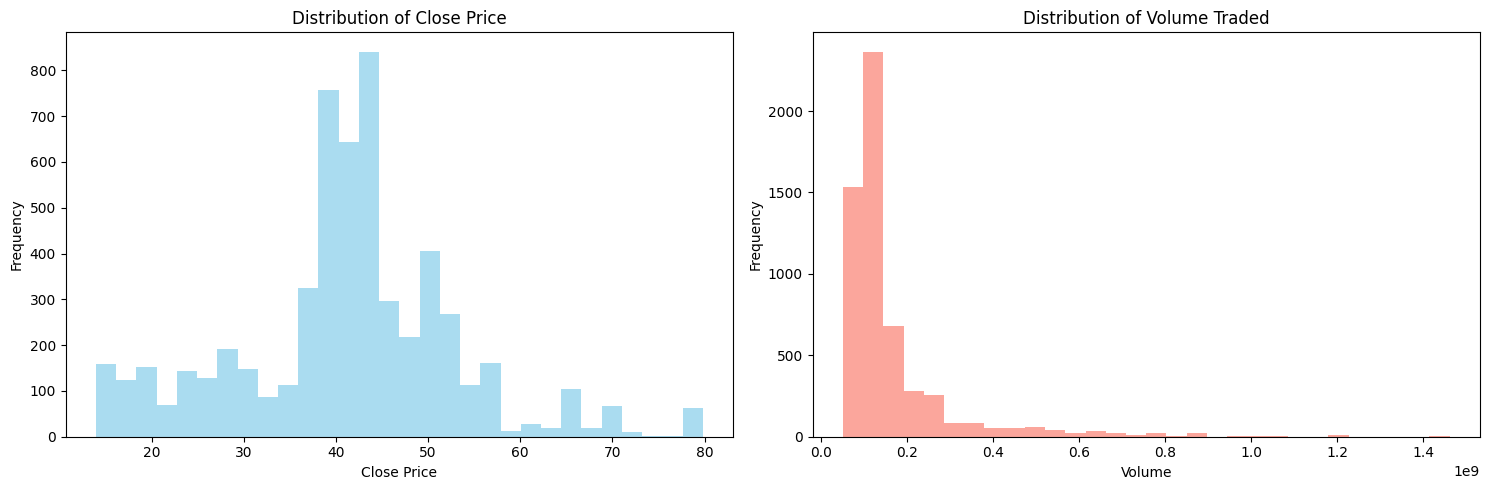

In [155]:
#Converting the PySpark DataFrame to a Pandas DataFrame
data_pd = df_stock.toPandas()

#Creating subplots for the histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

#Plotting histogram for 'Close' price
axes[0].hist(data_pd['Close'], bins=30, color='skyblue', alpha=0.7)
axes[0].set_title('Distribution of Close Price')
axes[0].set_xlabel('Close Price')
axes[0].set_ylabel('Frequency')

#Plotting histogram for 'Volume' traded
axes[1].hist(data_pd['Volume'], bins=30, color='salmon', alpha=0.7)
axes[1].set_title('Distribution of Volume Traded')
axes[1].set_xlabel('Volume')
axes[1].set_ylabel('Frequency')

#Adjusting the layouts of the plots
plt.tight_layout()

plt.show()







Determining the Schema of the DataFrame before cleaning the data.

In [156]:
df_stock.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- ticker: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- title: string (nullable = true)
 |-- content: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- label: integer (nullable = true)



The Spark SQL and accumulators are used to show a range of values for the `Close` price column. Finally, the filtered DataFrame within the range mentioned is shown and the count of rows within the specified range using the accumulator is displayed. Here for example, the lower and upper bound values for the Close price column is taken as 20 and 30 respectively.

In [159]:
from pyspark.accumulators import AccumulatorParam

#Defining the lower bound
lower_bound = 20.0
#Defining the upper bound
upper_bound = 30.0

#Creating an accumulator to count the rows within the specified range
class RangeAccumulator(AccumulatorParam):
    def zero(self, initialValue):
        return initialValue

    def addInPlace(self, v1, v2):
        return v1 + v2

range_accumulator = spark.sparkContext.accumulator(0, RangeAccumulator())

#Registering the DataFrame as a temporary SQL table
df_stock.createOrReplaceTempView("stock_data")

#Defininf and executing a SQL query to filter the data within the specified range from the table
query = f"SELECT * FROM stock_data WHERE Close >= {lower_bound} AND Close <= {upper_bound}"

#Executing the query and accumulating the count containing the value
result_df = spark.sql(query)
result_df.foreach(lambda _: range_accumulator.add(1))

#Showing the filtered DataFrame
result_df.show()

#Getting the count from the accumulator function
count_within_range = range_accumulator.value
print(f"Number of rows within the specified range: {count_within_range}")





+----+------+----------+--------+--------------------+--------------------+---------+-------+-----+-------+---------+---------+-----+
| _c0|ticker|      Date|category|               title|             content|     Open|   High|  Low|  Close|Adj Close|   Volume|label|
+----+------+----------+--------+--------------------+--------------------+---------+-------+-----+-------+---------+---------+-----+
|8296|  AAPL|2017-11-01|    news|Stocks hit high a...|By Chuck Mikolajc...|29.684999|29.9825|29.65|29.9375|28.063492|110354400|    1|
|8304|  AAPL|2017-11-01| opinion|Why Earnings Seas...|Investors are alw...|29.684999|29.9825|29.65|29.9375|28.063492|110354400|    1|
|8305|  AAPL|2017-11-01| opinion|Is A Surprise Com...|Investors are alw...|29.684999|29.9825|29.65|29.9375|28.063492|110354400|    1|
|8306|  AAPL|2017-11-01| opinion|AK Steel  AKS  Ea...|AK Steel Holding ...|29.684999|29.9825|29.65|29.9375|28.063492|110354400|    1|
|8307|  AAPL|2017-11-01| opinion|Why Earnings Seas...|Investor

# Section 2: Clean the data



Determine the number of rows and columns for inspecting the dataset befor data preprocessing steps.

In [160]:
num_rows = df_stock.count()
num_columns = len(df_stock.columns)


print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 133921
Number of columns: 13


Check the dataset for any duplicate values as the duplicate values can affect
the accuracy of your analysis and introduce bias. This will make sure the quality of the data before performing further analysis or modeling is good.

In [161]:
#Checking for duplicates and counting them
num_duplicates = df_stock.count() - df_stock.dropDuplicates().count()
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  13802


In [162]:
#Dropping duplicate rows and assigning the result to a new DataFrame
df_stock = df_stock.dropDuplicates()

Again determine the row and column count to make sure the duplicates has been removed.

In [163]:
num_rows = df_stock.count()
num_columns = len(df_stock.columns)


print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 120119
Number of columns: 13


In [164]:
df_stock.show()

+--------------------+-------+----------+---------+--------------------+--------------------+----------+---------+---------+---------+---------+---------+-----+
|                 _c0| ticker|      Date| category|               title|             content|      Open|     High|      Low|    Close|Adj Close|   Volume|label|
+--------------------+-------+----------+---------+--------------------+--------------------+----------+---------+---------+---------+---------+---------+-----+
|                   0|   AAPL|2020-01-27|  opinion|Apple Set To Beat...|Technology giant ...| 77.514999|77.942497|76.220001|77.237503|75.793358|161940000|    0|
|First  just becau...|   null|      null|     null|                null|                null|      null|     null|     null|     null|     null|     null| null|
|The two parties s...|80.0625| 80.832497|79.379997|           79.577499|           78.089607|1.465376E8|      0.0|     null|     null|     null|     null| null|
|                 ...|   null|    

After careful initial observation of the dataframe, conclusion was made to drop the column named `ticker` as it is not of much use and represents only that the data is of Apple Inc.

In [167]:
#Dropping the 'ticker' column
df_stock = df_stock.drop('ticker')
df_stock.show()

+--------------------+----------+---------+--------------------+--------------------+----------+---------+---------+---------+---------+---------+-----+
|                 _c0|      Date| category|               title|             content|      Open|     High|      Low|    Close|Adj Close|   Volume|label|
+--------------------+----------+---------+--------------------+--------------------+----------+---------+---------+---------+---------+---------+-----+
|                   0|2020-01-27|  opinion|Apple Set To Beat...|Technology giant ...| 77.514999|77.942497|76.220001|77.237503|75.793358|161940000|    0|
|First  just becau...|      null|     null|                null|                null|      null|     null|     null|     null|     null|     null| null|
|The two parties s...| 80.832497|79.379997|           79.577499|           78.089607|1.465376E8|      0.0|     null|     null|     null|     null| null|
|                 ...|      null|     null|                null|                nu

Check for any missing values in the dataframe, to make sure the dataset is consistent throughout the study.

In [169]:
from pyspark.sql.functions import col, sum

#Creating a list of column names in the DataFrame
columns = df_stock.columns

#Calculating the sum of missing values for each column
missing_value_counts = [sum(col(column).isNull().cast("int")).alias(column) for column in columns]

#Using select to display the results
df_stock.select(missing_value_counts).show()


+---+-----+--------+-----+-------+------+------+------+------+---------+------+------+
|_c0| Date|category|title|content|  Open|  High|   Low| Close|Adj Close|Volume| label|
+---+-----+--------+-----+-------+------+------+------+------+---------+------+------+
|  0|94700|   94700|94700|  94700|105007|105007|114451|114451|   114451|114451|114451|
+---+-----+--------+-----+-------+------+------+------+------+---------+------+------+



This suggests the counts of missing values for each column are unexpectedly high. Therefore, it indicates that there are no missing values (nulls) in any of the columns, as all the counts are equal to the total number of rows in the DataFrame.

However, in order to make sure the missing values needs to be handled properly using appropriate imputation method. Here, mean imputation is used to fill the null values.

In [173]:
from pyspark.sql.functions import mean

#Calculating the mean values for the columns
mean_open = df_stock.select(mean('Open')).collect()[0][0]
mean_high = df_stock.select(mean('High')).collect()[0][0]
mean_low = df_stock.select(mean('Low')).collect()[0][0]
mean_close = df_stock.select(mean('Close')).collect()[0][0]
mean_Adj_close = df_stock.select(mean('Adj Close')).collect()[0][0]


#Filling missing values in the specified columns with their means
df_stock_filled = df_stock \
    .na.fill(mean_open, subset=['Open']) \
    .na.fill(mean_high, subset=['High']) \
    .na.fill(mean_low, subset=['Low']) \
    .na.fill(mean_close, subset=['Close']) \
    .na.fill(mean_Adj_close, subset=['Adj Close'])

#Showing the DataFrame with filled values
df_stock_filled.show()



+--------------------+----------+---------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+
|                 _c0|      Date| category|               title|             content|               Open|              High|             Low|            Close|       Adj Close|   Volume|label|
+--------------------+----------+---------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+
|                   0|2020-01-27|  opinion|Apple Set To Beat...|Technology giant ...|          77.514999|         77.942497|       76.220001|        77.237503|       75.793358|161940000|    0|
|First  just becau...|      null|     null|                null|                null|9.460278990989678E7|15.904388404777663|40.7932330917431|41.15314210850388|39.3134048258645|     null| null|
|The two parties s...| 80.832497|79

Determine the datatype/Schema of the preprocessed dataset to assign datatypes that fit each feature/column.

In [174]:
df_stock_filled.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- title: string (nullable = true)
 |-- content: string (nullable = true)
 |-- Open: double (nullable = false)
 |-- High: double (nullable = false)
 |-- Low: double (nullable = false)
 |-- Close: double (nullable = false)
 |-- Adj Close: double (nullable = false)
 |-- Volume: integer (nullable = true)
 |-- label: integer (nullable = true)



`Date` column needs to be converted to datetime type for further study.


In [175]:
from pyspark.sql.functions import to_date

#Assuming 'Date' is in the format 'yyyy-MM-dd'
df_stock_filled = df_stock_filled.withColumn('Date', to_date(df_stock_filled['Date'], 'yyyy-MM-dd'))


In [176]:
#Selecting the 'Date' column from the DataFrame
date_column = df_stock_filled.select('Date')
date_column.printSchema()


root
 |-- Date: date (nullable = true)



In [177]:
#Generating a summary statistics for numerical columns in the DataFrame
summary = df_stock_filled.describe()

#Showing the summary statistics
summary.show()


+-------+--------------------+------------------+--------------------+--------------------+--------------------+-----------------+------------------+-----------------+------------------+--------------------+-------------------+
|summary|                 _c0|          category|               title|             content|                Open|             High|               Low|            Close|         Adj Close|              Volume|              label|
+-------+--------------------+------------------+--------------------+--------------------+--------------------+-----------------+------------------+-----------------+------------------+--------------------+-------------------+
|  count|              120119|             25419|               25419|               25419|              120119|           120119|            120119|           120119|            120119|                5668|               5668|
|   mean|   7964.690349024966| 39.75788841211353|  40.123363230728515|   38.239249150042

Based on the statistical analysis, it was found that:

*   The dataset contains 12,0119 data points for each numeric column.
*   The Open, High, Low, Close, Adj Close, and Volume columns have different ranges of values, with different means and standard deviations.
*   The label column appears to be a binary classification target, as it has values of 0 and 1, and with and a mean close to 0.553 indicates that it's slightly imbalanced toward one class.
*   The Open and other price-related columns have relatively high standard deviations, indicating significant price variability.



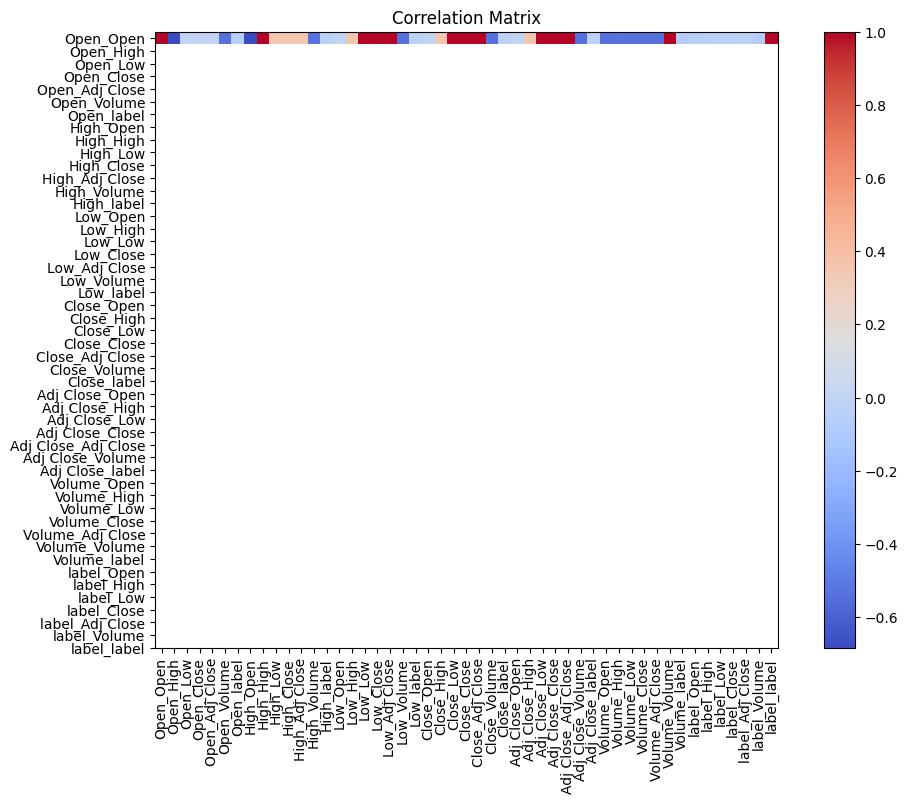

In [178]:
from pyspark.sql.functions import corr
import matplotlib.pyplot as plt

#Selecting only the numerical columns for correlation analysis
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'label']

#Calculating the correlation matrix for numerical columns
corr_matrix = df_stock_filled.select([corr(column1, column2).alias(column1 + '_' + column2)
                               for column1 in numerical_columns
                               for column2 in numerical_columns])

#Converting the correlation matrix DataFrame to a Pandas DataFrame
corr_matrix_pd = corr_matrix.toPandas()

#Plotting the correlation matrix
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix_pd, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix_pd.columns)), corr_matrix_pd.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix_pd.columns)), corr_matrix_pd.columns)
plt.title("Correlation Matrix")
plt.show()



In [179]:
corr_matrix_pd

Open_Open  Open_High      Open_Low    Open_Close  Open_Adj Close  \
0        1.0  -0.684051  7.351637e-08  7.349481e-08    7.346251e-08   

   Open_Volume  Open_label  High_Open  High_High  High_Low  ...  \
0    -0.533575   -0.054868  -0.684051        1.0  0.351166  ...   

   Volume_Adj Close  Volume_Volume  Volume_label  label_Open  label_High  \
0         -0.539204            1.0     -0.065905   -0.054868   -0.043241   

   label_Low  label_Close  label_Adj Close  label_Volume  label_label  
0  -0.038781    -0.028153        -0.029139     -0.065905          1.0  

[1 rows x 49 columns]

The correlation matrix is plotted as a heatmap to study the correlation analysis of the columns/features.

*   The columns `Open`,`High`,`Low`,`Close`,and `Adj Close` have very high positive correlations with each other. It means these stock prices columns is common to move together.
*   The `label` column, which appears to be a binary label, has very weak correlations with the other columns. This suggests that there is no strong linear relationship between this label and the stock price data or trading volume. The `label` column is likely not strongly dependent on the price or volume values.



# Section 3: Transform the clean data

- Split the data into train/test sets


No other outside data source is required for studying the project. Hence, sticking to the primary data source itself.



A UDF called `calculate_stock_price` is created to calculate the stock price based on the average of the given price columns which are `df_stock["Open", "High", "Low", "Close"]`. Then normalise the new column named `Stock Price` to get closed range for the values in the column and name it as `NormalizedStockPrice`.

In [183]:
#Defining the UDF to calculate the stock price
def calculate_stock_price(open, high, low, close):
    return (open + high + low + close ) / 4

#Registering UDF as a temporary function
spark.udf.register("calculate_stock_price_udf", calculate_stock_price)

#Registering DataFrame as a temporary SQL table
df_stock_filled.createOrReplaceTempView("stock_table")

#Using SQL expressions to calculate Stock Price and Normalized Stock Price
df_calculated = spark.sql("""
    SELECT *,
           calculate_stock_price_udf(Open, High, Low, Close) AS StockPrice,
           (calculate_stock_price_udf(Open, High, Low, Close) - MIN(calculate_stock_price_udf(Open, High, Low, Close))
           OVER ()) / (MAX(calculate_stock_price_udf(Open, High, Low, Close))
           OVER () - MIN(calculate_stock_price_udf(Open, High, Low, Close))
           OVER ()) AS NormalizedStockPrice
    FROM stock_table
""")

#Showing the resulting DataFrame
df_calculated.show(5)





+--------------------+----------+---------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+--------------------+--------------------+
|                 _c0|      Date| category|               title|             content|               Open|              High|             Low|            Close|       Adj Close|   Volume|label|          StockPrice|NormalizedStockPrice|
+--------------------+----------+---------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+--------------------+--------------------+
|                   0|2020-01-27|  opinion|Apple Set To Beat...|Technology giant ...|          77.514999|         77.942497|       76.220001|        77.237503|       75.793358|161940000|    0|   77.22874999999999|   405.5593381186318|
|First  just becau...|      null|     null|                n

Calculate the correlation between the newly created column named `NormalizedStockPrice` and the `Volume`.

In [184]:
from pyspark.sql.functions import corr

correlation = df_calculated.select(corr('Volume', 'NormalizedStockPrice')).collect()[0][0]

print("Correlation between Volume and Normalized Stock Price:", correlation)



Correlation between Volume and Normalized Stock Price: 0.5352660926763024


This indicates a moderate positive correlation between these two variables.This implies that there is a noticeable but not extremely strong tendency for volume and normalized stock price to move in opposite directions.

Creating vectors for relavent features and One-hot encode for the catagorical variables.

In [185]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

Adding a unique identifier column called id to the Dataframe using the monotonically_increasing_id module.

In [187]:
from pyspark.sql.functions import monotonically_increasing_id

#Adding a unique identifier column called id
df_calculated = df_calculated.withColumn("id", monotonically_increasing_id())

#Showing the DataFrame with the 'id' column
df_calculated.show()

+--------------------+----------+---------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+--------------------+--------------------+---+
|                 _c0|      Date| category|               title|             content|               Open|              High|             Low|            Close|       Adj Close|   Volume|label|          StockPrice|NormalizedStockPrice| id|
+--------------------+----------+---------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+--------------------+--------------------+---+
|                   0|2020-01-27|  opinion|Apple Set To Beat...|Technology giant ...|          77.514999|         77.942497|       76.220001|        77.237503|       75.793358|161940000|    0|   77.22874999999999|   405.5593381186318|  0|
|First  just becau...|      null|     null| 

Filter the Dataframe to include only rows with news and opinion category in the category column to make sure only those two are considered(Upon investigation, it was found that the category column contained some numerical/integer values in the row, which is now discarded).

In [188]:
from pyspark.sql.functions import col

#Filtering the DataFrame to include only "news" and "opinion" categories
filtered_df = df_calculated.filter((col("category") == "news") | (col("category") == "opinion"))

#Showing the resulting DataFrame
filtered_df.show()



+----+----------+--------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+--------------------+--------------------+---+
| _c0|      Date|category|               title|             content|               Open|              High|             Low|            Close|       Adj Close|   Volume|label|          StockPrice|NormalizedStockPrice| id|
+----+----------+--------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+--------------------+--------------------+---+
|   0|2020-01-27| opinion|Apple Set To Beat...|Technology giant ...|          77.514999|         77.942497|       76.220001|        77.237503|       75.793358|161940000|    0|   77.22874999999999|   405.5593381186318|  0|
|  28|2020-01-23| opinion|Exact Sciences  G...|For Immediate Rel...|          79.480003|         79.889999|     

Converting the category column to include numerical values representing news and opinion.

In [189]:
from pyspark.ml.feature import StringIndexer

#Creating a StringIndexer to convert 'category' column to numerical values
string_indexer = StringIndexer(inputCol="category", outputCol="category_index", handleInvalid="skip")

#Fitting and transforming the DataFrame
df_calculated_indexed = string_indexer.fit(filtered_df).transform(filtered_df)

#Showing the DataFrame with the indexed 'category' column
df_calculated_indexed.select("category", "category_index").show()


+--------+--------------+
|category|category_index|
+--------+--------------+
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
|    news|           1.0|
|    news|           1.0|
|    news|           1.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
| opinion|           0.0|
|    news|           1.0|
| opinion|           0.0|
+--------+--------------+
only showing top 20 rows



In [191]:
#Selecting the 'category' column and using distinct() to get unique values
unique_categories = df_calculated_indexed.select("category").distinct()

unique_categories_index = df_calculated_indexed.select("category_index").distinct()


#Showing the unique categories and indexes
unique_categories.show()
unique_categories_index.show()


+--------+
|category|
+--------+
|    news|
| opinion|
+--------+

+--------------+
|category_index|
+--------------+
|           0.0|
|           1.0|
+--------------+



The unique categories are then used to create feature labels.

In [192]:
from pyspark.sql.functions import col

#Selecting the 'category' column and use distinct() to get unique values
unique_categories = df_calculated_indexed.select("category").distinct()

#Extracting unique category values as a list
unique_categories_list = [row.category for row in unique_categories.collect()]

#Creating a feature labels by prefixing 'category_' to each unique value
feature_labels = ['category_' + cat for cat in unique_categories_list]

#Showing the feature labels
print(feature_labels)



['category_news', 'category_opinion']


In [193]:
df_calculated_indexed.show()

+----+----------+--------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+--------------------+--------------------+---+--------------+
| _c0|      Date|category|               title|             content|               Open|              High|             Low|            Close|       Adj Close|   Volume|label|          StockPrice|NormalizedStockPrice| id|category_index|
+----+----------+--------+--------------------+--------------------+-------------------+------------------+----------------+-----------------+----------------+---------+-----+--------------------+--------------------+---+--------------+
|   0|2020-01-27| opinion|Apple Set To Beat...|Technology giant ...|          77.514999|         77.942497|       76.220001|        77.237503|       75.793358|161940000|    0|   77.22874999999999|   405.5593381186318|  0|           0.0|
|  28|2020-01-23| opinion|Exact Sciences  G...|For I

Filter out/Extract the important columns from the DataFrame that is further required for building the model and the analysis. Also, set the date column as index and sort the entire DataFrame with relevant features based on the trading date.

In [194]:
#Filtering the important columns required
df_calculated_indexed = df_calculated_indexed.select(
    'Date', 'category', 'title', 'content', 'Open', 'High', 'Low', 'Close', 'Volume', 'label')

#Setting column 'Date' as the index column
df_calculated_indexed = df_calculated_indexed.withColumnRenamed("Date", "Original_Date")

#Sorting the data according to the index 'Original_Date'
df_calculated_indexed = df_calculated_indexed.orderBy("Original_Date")

#Showing the resulting DataFrame
df_calculated_indexed.show()



+-------------+--------+--------------------+--------------------+---------+---------+---------+---------+---------+-----+
|Original_Date|category|               title|             content|     Open|     High|      Low|    Close|   Volume|label|
+-------------+--------+--------------------+--------------------+---------+---------+---------+---------+---------+-----+
|   2012-07-23| opinion|Trade Apple After...|It may look like ...|21.228571|21.639286|20.989643|21.565357|487975600|    1|
|   2012-07-23| opinion|Summer Heat Scorc...|Europe flares as ...|21.228571|21.639286|20.989643|21.565357|487975600|    1|
|   2012-07-23| opinion|Apple Earnings Pr...|Last quarter Appl...|21.228571|21.639286|20.989643|21.565357|487975600|    1|
|   2012-07-24| opinion|Market Bait And S...|That is the sound...|21.692142|21.774286|21.375357| 21.46143|565132400|    0|
|   2012-07-27| opinion|Will AAPL Fall Fr...|Apple s  AAPL  sa...|20.536072|20.922501|20.413929|20.898571|403936400|    1|
|   2012-07-30| 

VADER is a sentiment analysis tool that assigns sentiment scores to individual words and can be used to analyze the sentiment of text data.

In [195]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The sentimental Analysis of the content and the title column is done using the SentimentIntensityAnalyzer and the respective scorese are stored in the column compound_tit and compound_con.The sentiment scores range from -1 to 1, where -1 indicates extremely negative sentiment, 1 indicates extremely positive sentiment, and 0 indicates a neutral sentiment.

In [196]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

#Defining UDFs (User-Defined Functions) for calculating sentiment scores
def calculate_sentiment_scores(text):
    sentiment_scores = sid.polarity_scores(text)
    return float(sentiment_scores['compound'])

#Registering UDFs with PySpark
sentiment_udf = udf(calculate_sentiment_scores, FloatType())

#Calculating sentiment scores for 'title' column
df_calculated_indexed = df_calculated_indexed.withColumn(
    'compound_tit', sentiment_udf(df_calculated_indexed['title'])
)

#Calculating sentiment scores for 'content' column
df_calculated_indexed = df_calculated_indexed.withColumn(
    'compound_con', sentiment_udf(df_calculated_indexed['content'])
)

#Displaying the updated df_calculated_indexed DataFrame
df_calculated_indexed.show()


+-------------+--------+--------------------+--------------------+---------+---------+---------+---------+---------+-----+------------+------------+
|Original_Date|category|               title|             content|     Open|     High|      Low|    Close|   Volume|label|compound_tit|compound_con|
+-------------+--------+--------------------+--------------------+---------+---------+---------+---------+---------+-----+------------+------------+
|   2012-07-23| opinion|Trade Apple After...|It may look like ...|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9103|
|   2012-07-23| opinion|Apple Earnings Pr...|Last quarter Appl...|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9957|
|   2012-07-23| opinion|Summer Heat Scorc...|Europe flares as ...|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|     -0.9239|
|   2012-07-24| opinion|Market Bait And S...|That is the sound...|21.692142|21.774286|21.375357| 21.46143|

Create two new columns named news and opinion based on the values in the category column. If the category is news, the news column has value 1 and for opinion, the opinion column has 1 otherwise 0.

In [197]:
from pyspark.sql.functions import when

#Creating new columns "news" and "opinion" based on "category"
df_calculated_indexed = df_calculated_indexed.withColumn("news", when(df_calculated_indexed["category"] == "news", 1).otherwise(0))
df_calculated_indexed = df_calculated_indexed.withColumn("opinion", when(df_calculated_indexed["category"] == "opinion", 1).otherwise(0))

#Showing the updated DataFrame
df_calculated_indexed.show()


+-------------+--------+--------------------+--------------------+---------+---------+---------+---------+---------+-----+------------+------------+----+-------+
|Original_Date|category|               title|             content|     Open|     High|      Low|    Close|   Volume|label|compound_tit|compound_con|news|opinion|
+-------------+--------+--------------------+--------------------+---------+---------+---------+---------+---------+-----+------------+------------+----+-------+
|   2012-07-23| opinion|Trade Apple After...|It may look like ...|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9103|   0|      1|
|   2012-07-23| opinion|Apple Earnings Pr...|Last quarter Appl...|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9957|   0|      1|
|   2012-07-23| opinion|Summer Heat Scorc...|Europe flares as ...|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|     -0.9239|   0|      1|
|   2012-07-24| opinion|Mark

Drop all the unwanted columns such as title, content and category as respective sentiments and columns has already been created.

In [198]:
#Dropping the unwanted columns
columns_to_drop = ["title", "content", "category"]
df_calculated_indexed = df_calculated_indexed.drop(*columns_to_drop)

#Displaying the updated DataFrame
df_calculated_indexed.show()


+-------------+---------+---------+---------+---------+---------+-----+------------+------------+----+-------+
|Original_Date|     Open|     High|      Low|    Close|   Volume|label|compound_tit|compound_con|news|opinion|
+-------------+---------+---------+---------+---------+---------+-----+------------+------------+----+-------+
|   2012-07-23|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9103|   0|      1|
|   2012-07-23|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9957|   0|      1|
|   2012-07-23|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|     -0.9239|   0|      1|
|   2012-07-24|21.692142|21.774286|21.375357| 21.46143|565132400|    0|         0.0|     -0.6101|   0|      1|
|   2012-07-27|20.536072|20.922501|20.413929|20.898571|403936400|    1|         0.0|      0.7501|   0|      1|
|   2012-07-30|21.104286|21.408571| 20.99357|21.251072|379142400|    1|     -0.4588|     -0.9588|   0|      1|
|

A detailed profiling of the resultant final DataFrame is done using the pandas-profiling.

In [199]:
!pip install pandas-profiling


In order to do the pandas-profiling the Spark DataFrame needs to be converted to Pandas DataFrame and the profile report is stored as html file.

In [200]:
#Converting the PySpark DataFrame to a Pandas DataFrame
df_stock_pandas = df_calculated_indexed.toPandas()

#Importing the pandas_profiling library
from pandas_profiling import ProfileReport

#Generating the profile report
prof = ProfileReport(df_stock_pandas)

#Saving the report to an HTML file
prof.to_file(output_file='output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Displaying the Pandas Profiling Report.

In [201]:
prof.to_notebook_iframe()


The `Close` price column is plotted to understand the distribution of the values in the column as it is going to be considered as the target variable for prediction.

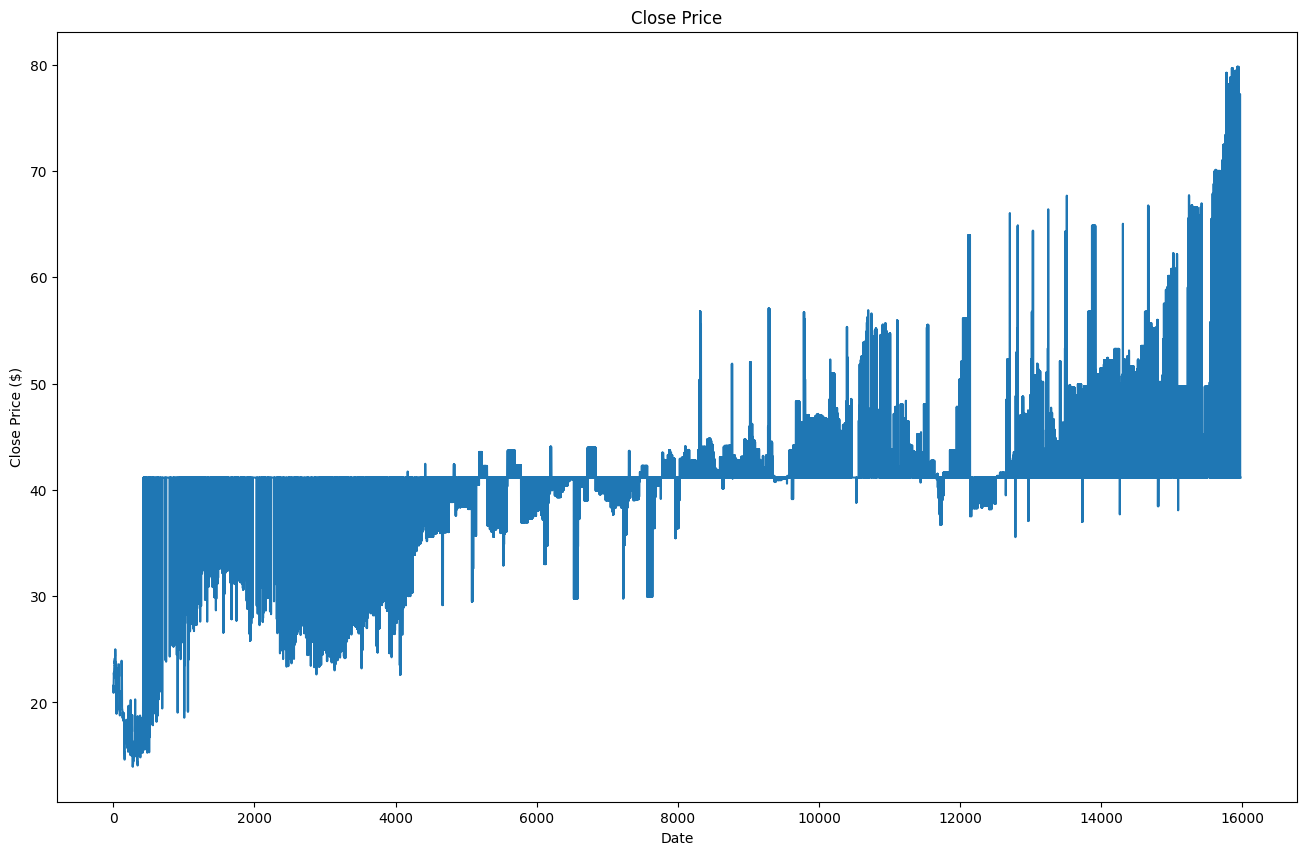

In [202]:
#Importing matplotlib
import matplotlib.pyplot as plt

#Setting the figure size
plt.figure(figsize=(16, 10))

#Plotting close price
plt.plot(df_stock_pandas['Close'])

#Setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

#Showing the plot
plt.show()

Next, calculate the rolling mean value for a window period of 7 days(1 week) using the Window module. The rolling mean can be used for Time series prediction of stock prices which is actually the future scope of this project.

In [203]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

#Defining the window specification
window_spec = Window.orderBy('Original_Date').rowsBetween(-6, 0)

#Calculating the rolling mean
df_calculated_indexed = df_calculated_indexed.withColumn('rolling_mean_7', F.avg('Close').over(window_spec))

#Showing the DataFrame with the rolling mean column
df_calculated_indexed.show()


+-------------+---------+---------+---------+---------+---------+-----+------------+------------+----+-------+------------------+
|Original_Date|     Open|     High|      Low|    Close|   Volume|label|compound_tit|compound_con|news|opinion|    rolling_mean_7|
+-------------+---------+---------+---------+---------+---------+-----+------------+------------+----+-------+------------------+
|   2012-07-23|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9103|   0|      1|         21.565357|
|   2012-07-23|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9957|   0|      1|         21.565357|
|   2012-07-23|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|     -0.9239|   0|      1|21.565356999999995|
|   2012-07-24|21.692142|21.774286|21.375357| 21.46143|565132400|    0|         0.0|     -0.6101|   0|      1|       21.53937525|
|   2012-07-27|20.536072|20.922501|20.413929|20.898571|403936400|    1|         0.0|      

Hence, this concludes the transformation steps of the cleaned data.

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results

Here, a deep learning model is being constructed using TensorFlow's Keras API. The code proposes a deep learning model with three LSTM layers followed by Dropout layers and a final Dense layer for the prediction task. The model architecture is summarized to provide an overview of its structure and parameter count.

In [204]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

#Setting the seed for random number generators in TensorFlow and NumPy
tf.random.set_seed(2016)
np.random.seed(2016)

#defining the model architecture
model = Sequential()
model.add(LSTM(100, return_sequences=True, activation='tanh', input_shape=(len(cols), 1)))
model.add(Dropout(0.1))
model.add(LSTM(100, return_sequences=True, activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

#Printing the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 9, 100)            40800     
                                                                 
 dropout_15 (Dropout)        (None, 9, 100)            0         
                                                                 
 lstm_17 (LSTM)              (None, 9, 100)            80400     
                                                                 
 dropout_16 (Dropout)        (None, 9, 100)            0         
                                                                 
 lstm_18 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                

The code sets up an LSTM-based regression model for predicting stock prices, trains it on historical data, and evaluates its performance on a separate test dataset. The goal is to assess how well the model can predict future stock prices based on the provided features. The LSTM architecture is given above. The different steps involved from model definition to prediction is listed in the comments of the code.

In [205]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#Extracting relevant columns
data = df_calculated_indexed[['Original_Date', 'Open', 'High', 'Low', 'Volume', 'label', 'compound_tit', 'compound_con', 'news', 'opinion', 'rolling_mean_7', 'Close']].toPandas()

#Creating sequences
sequence_length = 7  # You can adjust this window size
sequences = [data.iloc[i:i+sequence_length].values for i in range(len(data) - sequence_length)]

#Preparing features and target
X = np.array([seq[:, 1:-1] for seq in sequences])  # Exclude Date and Close as features
y = np.array([seq[-1, -1] for seq in sequences])  # Close price as target

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Reshaping data to 2D
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

#Normalizing data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Reshaping back to 3D
X_train = X_train.reshape(X_train.shape[0], sequence_length, -1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, -1)

#Defining LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

#Evaluating the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

#Predicting stock prices
y_pred = model.predict(X_test)


Epoch 1/50
200/200 [==============================] - 5s 14ms/step - loss: nan - val_loss: nan
Epoch 2/50
200/200 [==============================] - 2s 8ms/step - loss: nan - val_loss: nan
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: nan - val_loss: nan
Epoch 4/50
200/200 [==============================] - 2s 8ms/step - loss: nan - val_loss: nan
Epoch 5/50
200/200 [==============================] - 2s 8ms/step - loss: nan - val_loss: nan
Epoch 6/50
200/200 [==============================] - 2s 9ms/step - loss: nan - val_loss: nan
Epoch 7/50
200/200 [==============================] - 2s 9ms/step - loss: nan - val_loss: nan
Epoch 8/50
200/200 [==============================] - 2s 12ms/step - loss: nan - val_loss: nan
Epoch 9/50
200/200 [==============================] - 3s 13ms/step - loss: nan - val_loss: nan
Epoch 10/50
200/200 [==============================] - 2s 12ms/step - loss: nan - val_loss: nan
Epoch 11/50
200/200 [==============================] - 

The output for all the 50 epoches is the training progress of the LSTM neural network model using TensorFlow's Keras API. However, it appears that there's an issue with the training process because both the training loss (loss) and validation loss (val_loss) are reported as "nan," which stands for "not a number." Due to time constarint, and also, since PySpark doesn't support LSTM models, other model called linear regression is going to be considered.

Splitting the data for training and testing purposes.

In [207]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data * (df_calculated_indexed.count() - 1))

# using 80% of data for training
train_end = int(data_to_use * 0.8)
total_data = df_calculated_indexed.count()
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 12779
Number of records in Test Data: 3196


In [208]:
#Defining the start and end indices
start_index = 0
end_index = df_calculated_indexed.count()

#Selecting columns of interest
selected_data = df_calculated_indexed.select(
    col("Original_Date"),
    col("Open"),
    col("High"),
    col("Low"),
    col("Close"),
    col("Volume"),
    col("label"),
    col("compound_tit"),
    col("compound_con"),
    col("rolling_mean_7")
    ).orderBy("Original_Date")

#Showing the selected data
selected_data.show()





+-------------+---------+---------+---------+---------+---------+-----+------------+------------+------------------+
|Original_Date|     Open|     High|      Low|    Close|   Volume|label|compound_tit|compound_con|    rolling_mean_7|
+-------------+---------+---------+---------+---------+---------+-----+------------+------------+------------------+
|   2012-07-23|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|     -0.9239|21.565356999999995|
|   2012-07-23|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9957|         21.565357|
|   2012-07-23|21.228571|21.639286|20.989643|21.565357|487975600|    1|         0.0|      0.9103|         21.565357|
|   2012-07-24|21.692142|21.774286|21.375357| 21.46143|565132400|    0|         0.0|     -0.6101|       21.53937525|
|   2012-07-27|20.536072|20.922501|20.413929|20.898571|403936400|    1|         0.0|      0.7501|        21.4112144|
|   2012-07-30|21.104286|21.408571| 20.99357|21.251072|379142400

Calculating the shifted values for the stock prices and sentiment scores by one day.

In [209]:
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window

#Defining the window specification for shifting
window_spec = Window().orderBy("Original_Date")

#Shifting the 'Close' column by one day
selected_data = selected_data.withColumn("close_price_shifted", lag(col("Close")).over(window_spec))

#Shifting the 'compound_tit' column by one day
selected_data = selected_data.withColumn("compound_shifted_tit", lag(col("compound_tit")).over(window_spec))

#Shifting the 'compound_con' column by one day
selected_data = selected_data.withColumn("compound_shifted_con", lag(col("compound_con")).over(window_spec))

#Selecting the columns
data = selected_data.select(
    "Original_Date",
    "Close",
    "close_price_shifted",
    "compound_con",
    "compound_shifted_con",
    "compound_shifted_tit",
    "compound_tit",
    "Volume",
    "Open",
    "High",
    "Low"
)

#Dropping rows with null values
data = data.na.drop()

data.show()


+-------------+---------+-------------------+------------+--------------------+--------------------+------------+---------+---------+---------+---------+
|Original_Date|    Close|close_price_shifted|compound_con|compound_shifted_con|compound_shifted_tit|compound_tit|   Volume|     Open|     High|      Low|
+-------------+---------+-------------------+------------+--------------------+--------------------+------------+---------+---------+---------+---------+
|   2012-07-23|21.565357|          21.565357|      0.9957|              0.9103|                 0.0|         0.0|487975600|21.228571|21.639286|20.989643|
|   2012-07-23|21.565357|          21.565357|     -0.9239|              0.9957|                 0.0|         0.0|487975600|21.228571|21.639286|20.989643|
|   2012-07-24| 21.46143|          21.565357|     -0.6101|             -0.9239|                 0.0|         0.0|565132400|21.692142|21.774286|21.375357|
|   2012-07-27|20.898571|           21.46143|      0.7501|             -0.61

Now assign the shifted close price by one day as target variable for prediction.

In [210]:
from pyspark.sql.functions import col

#Setting the target variable as the shifted close_price
y = data.select(col("close_price_shifted"))

#Showing the target variable
y.show()



+-------------------+
|close_price_shifted|
+-------------------+
|          21.565357|
|          21.565357|
|          21.565357|
|           21.46143|
|          20.898571|
|          21.251072|
|          21.812857|
|          21.812857|
|          22.791786|
|          22.560356|
|          22.560356|
|          22.529642|
|          22.726429|
|          23.146786|
|          23.430714|
|          23.430714|
|          23.430714|
|          23.888214|
|          23.888214|
|          23.665358|
+-------------------+
only showing top 20 rows



Selecting the features DataFrame as x.

In [211]:
from pyspark.sql.functions import col


#Defining the list of columns as features
cols = ['Close', 'compound_con', 'compound_shifted_con', 'compound_shifted_tit', 'compound_tit', 'Volume', 'Open', 'High', 'Low']

#Selecting the columns from the DataFrame
x = data.select(*[col(c) for c in cols])

#Showing the features dataset
x.show()



+---------+------------+--------------------+--------------------+------------+---------+---------+---------+---------+
|    Close|compound_con|compound_shifted_con|compound_shifted_tit|compound_tit|   Volume|     Open|     High|      Low|
+---------+------------+--------------------+--------------------+------------+---------+---------+---------+---------+
|21.565357|      0.9957|              0.9103|                 0.0|         0.0|487975600|21.228571|21.639286|20.989643|
|21.565357|     -0.9239|              0.9957|                 0.0|         0.0|487975600|21.228571|21.639286|20.989643|
| 21.46143|     -0.6101|             -0.9239|                 0.0|         0.0|565132400|21.692142|21.774286|21.375357|
|20.898571|      0.7501|             -0.6101|                 0.0|         0.0|403936400|20.536072|20.922501|20.413929|
|21.251072|     -0.9588|              0.7501|                 0.0|     -0.4588|379142400|21.104286|21.408571| 20.99357|
|21.812857|      0.9997|             -0.

Next Normalisation and Feature selection is done on the selected features and the target variable columns using the MinMaxScalar. The details of the normalisation and the feature selection is explained in the comments.

In [212]:
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.sql.functions import col

#Defining the list of feature column names
feature_cols = ['Close', 'compound_con', 'compound_shifted_con', 'compound_shifted_tit', 'compound_tit', 'Volume', 'Open', 'High', 'Low']

#Assembling the features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_data = assembler.transform(data)

#Initializing the MinMaxScaler for both features and target variable
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_data)

#Normalizing the features and target variable to the specified range [-1, 1]
scaled_data = scaler_model.transform(assembled_data)

#Selecting the scaled feature and target variable columns
x = scaled_data.select("scaled_features")
y = scaled_data.select(col("close_price_shifted"))

#Showing the scaled feature dataset
x.show()

#Showing the scaled target variable
y.show()


+--------------------+
|     scaled_features|
+--------------------+
|[0.11566742564527...|
|[0.11566742564527...|
|[0.11408942693185...|
|[0.10554313214956...|
|[0.11089540946422...|
|[0.11942539692869...|
|[0.11942539692869...|
|[0.13428918307215...|
|[0.13077521420702...|
|[0.13077521420702...|
|[0.13030886135853...|
|[0.13329682053005...|
|[0.13967940450898...|
|[0.14399048843043...|
|[0.14399048843043...|
|[0.14399048843043...|
|[0.15093704140888...|
|[0.15093704140888...|
|[0.14755325777923...|
|[0.15462996562572...|
+--------------------+
only showing top 20 rows

+-------------------+
|close_price_shifted|
+-------------------+
|          21.565357|
|          21.565357|
|          21.565357|
|           21.46143|
|          20.898571|
|          21.251072|
|          21.812857|
|          21.812857|
|          22.791786|
|          22.560356|
|          22.560356|
|          22.529642|
|          22.726429|
|          23.146786|
|          23.430714|
|          23.430714|
|   

In [217]:
from pyspark.sql.functions import monotonically_increasing_id

x = x.withColumn("id", monotonically_increasing_id())
y = y.withColumn("id", monotonically_increasing_id())

#Joining 'x' and 'y' on the ID column to keep them synchronized
joined_data = x.join(y, "id").drop("id")

#Defining the percentage of data for training
percentage_of_data = 0.8

#Calculating the number of rows to be used for training
data_count = joined_data.count()
train_count = int(percentage_of_data * data_count)

#Spliting the data into training and test sets
train_data = joined_data.limit(train_count)
test_data = joined_data.subtract(train_data)



In [219]:
# Separate the feature columns (X) and the target column (y) as vectors
X_train = train_data.select("scaled_features")
y_train = train_data.select("close_price_shifted")

X_test = test_data.select("scaled_features")
y_test = test_data.select("close_price_shifted")
'''
# Print the shape of the training and test datasets
print("Number of rows and columns in the Training set X:", X_train.count(), "and y:", y_train.count())
print("Number of rows and columns in the Test set X:", X_test.count(), "and y:", y_test.count())
'''

'\n# Print the shape of the training and test datasets\nprint("Number of rows and columns in the Training set X:", X_train.count(), "and y:", y_train.count())\nprint("Number of rows and columns in the Test set X:", X_test.count(), "and y:", y_test.count())\n'

Building a linear regression model to predict the close_price_shifted and evaluating the results/performance of the model.

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

feature_columns = ['scaled_features']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_data = assembler.transform(train_data)

lr = LinearRegression(featuresCol="features", labelCol="close_price_shifted", maxIter=100, regParam=0.0)


#Fitting the model to the training data
lr_model = lr.fit(train_data)

#Making predictions on the test data
predictions = lr_model.transform(test_data)

#Evaluating the model's performance
evaluator = RegressionEvaluator(labelCol="close_price_shifted", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})

#Printing the evaluation results
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

#Showing the predictions
predictions.select("close_price_shifted", "prediction").show()


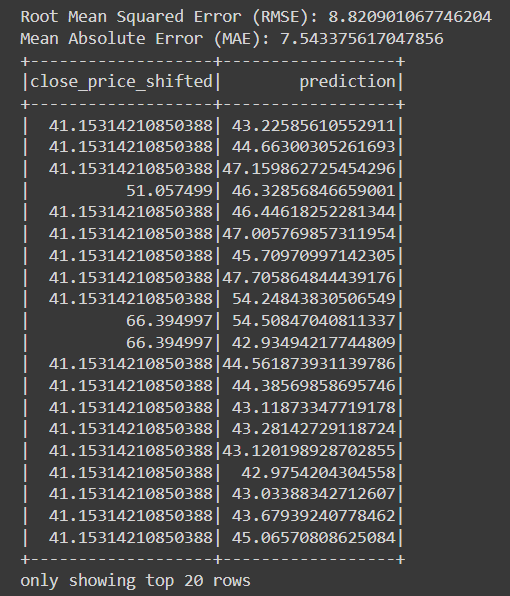

RMSE  metric indicates the average magnitude of the errors between the model's predictions and the actual close prices. An RMSE of approximately 8.82 suggests that, on average, the model's predictions have an error of around 8.82 units of the currency in which close prices are measured. Lower RMSE values are generally better, indicating that the model's predictions are closer to the actual prices.

The MAE metric provides another measure of the average error between predictions and actual prices. An MAE of approximately 7.54 means that, on average, your model's predictions have an absolute error of around 7.54 units of the currency. Like RMSE, lower MAE values are better.


`NOTE:Initial run gave correct working linear regression model and the screenshot for the same is attched for reference.`

## GCP Set Up

All the following commands needs to be run in the Google CLI command prompt installed in the system.

In [ ]:
gcloud init
gcloud projects create dsci-632-cloud-project
gcloud config set project dsci-632-cloud-project

In [ ]:
gcloud services enable dataflow.googleapis.com  compute.googleapis.com  logging.googleapis.com  storage-component.googleapis.com  storage-api.googleapis.com  pubsub.googleapis.com  cloudresourcemanager.googleapis.com  cloudscheduler.googleapis.com

In [ ]:
gcloud iam service-accounts create stockacc

Grant roles to the service account. Run the following command once for each of the following IAM roles: roles/dataflow.worker, roles/storage.objectAdmin, roles/pubsub.admin:

In [ ]:
gcloud projects add-iam-policy-binding dsci-632-cloud-project --member="serviceAccount:stockacc@dsci-632-cloud-project.iam.gserviceaccount.com" --role=roles/pubsub.admin

In [ ]:
gcloud projects add-iam-policy-binding dsci-632-cloud-project --member="serviceAccount:stockacc@dsci-632-cloud-project.iam.gserviceaccount.com" --role=roles/dataflow.worker

In [ ]:
gcloud projects add-iam-policy-binding dsci-632-cloud-project --member="serviceAccount:stockacc@dsci-632-cloud-project.iam.gserviceaccount.com" --role=roles/storage.objectAdmin

In [ ]:
gcloud auth application-default login

In [ ]:
BUCKET_NAME=stockbucketdsci
PROJECT_ID=$(gcloud config get-value project)
TOPIC_ID=stock_topic_id
REGION=us-central1-f
SERVICE_ACCOUNT=stockacc@dsci-632-cloud-project.iam.gserviceaccount.com

In [ ]:
gsutil mb gs://stockbucketdsci

In [ ]:
gcloud pubsub topics create stock_topic_id

In [ ]:
gcloud scheduler jobs create pubsub stockdscijob --schedule="* * * * *" \
    --topic=stock_topic_id --message-body="Heyyyyyyyy!!! Welcome to the stock prediction project" --location=us-central1-f

In [ ]:
gcloud scheduler jobs run stockdscijob --location=us-central1-f


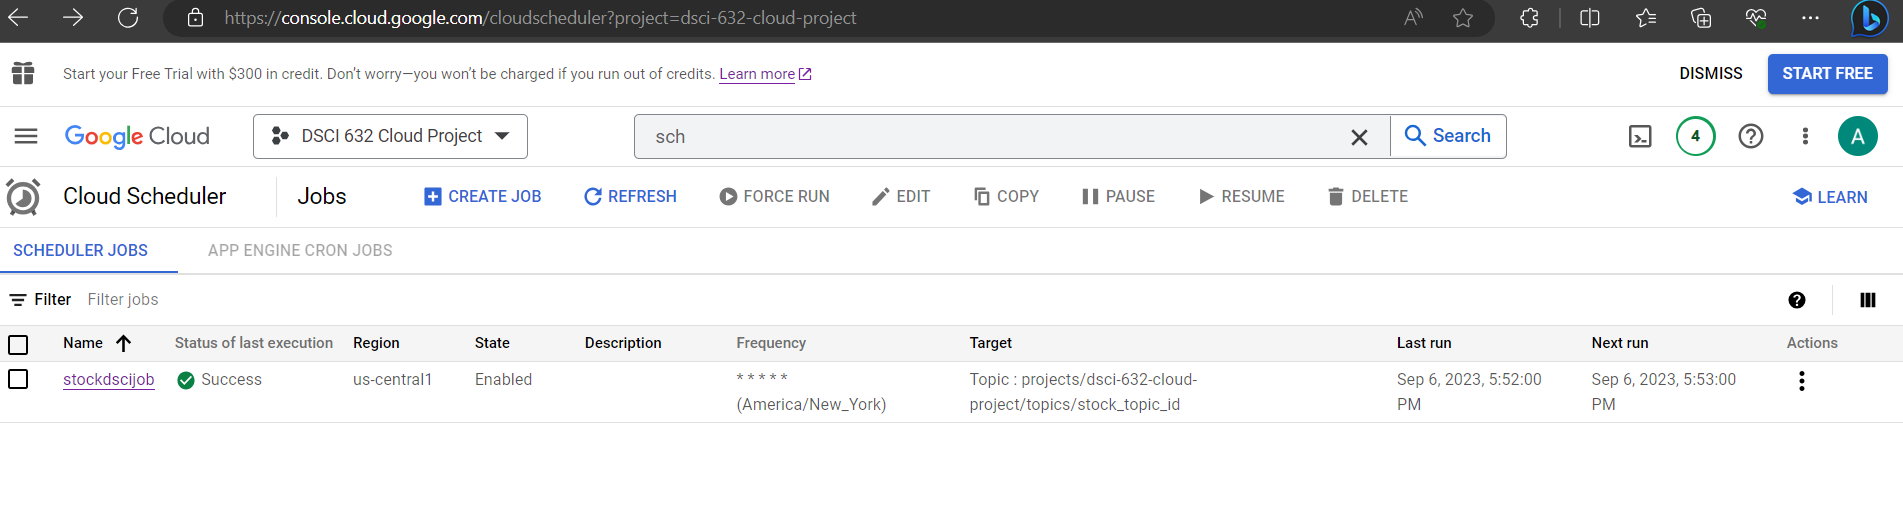

`The python SDK command line terminal code to run the pipeline_script.py file is given below.`

python C:\Users\anami\OneDrive\Desktop\pipeline_script.py --project=dsci-632-cloud-project --region=us-central1-f --input_topic=projects/dsci-632-cloud-project/topics/stock_topic_id --output_path=gs://stockbucketdsci/samples/output --runner=DataflowRunner --window_size=2 --num_shards=2 --temp_location=gs://stockbucketdsci/temp --service_account_email=stockacc@dsci-632-cloud-project.iam.gserviceaccount.com

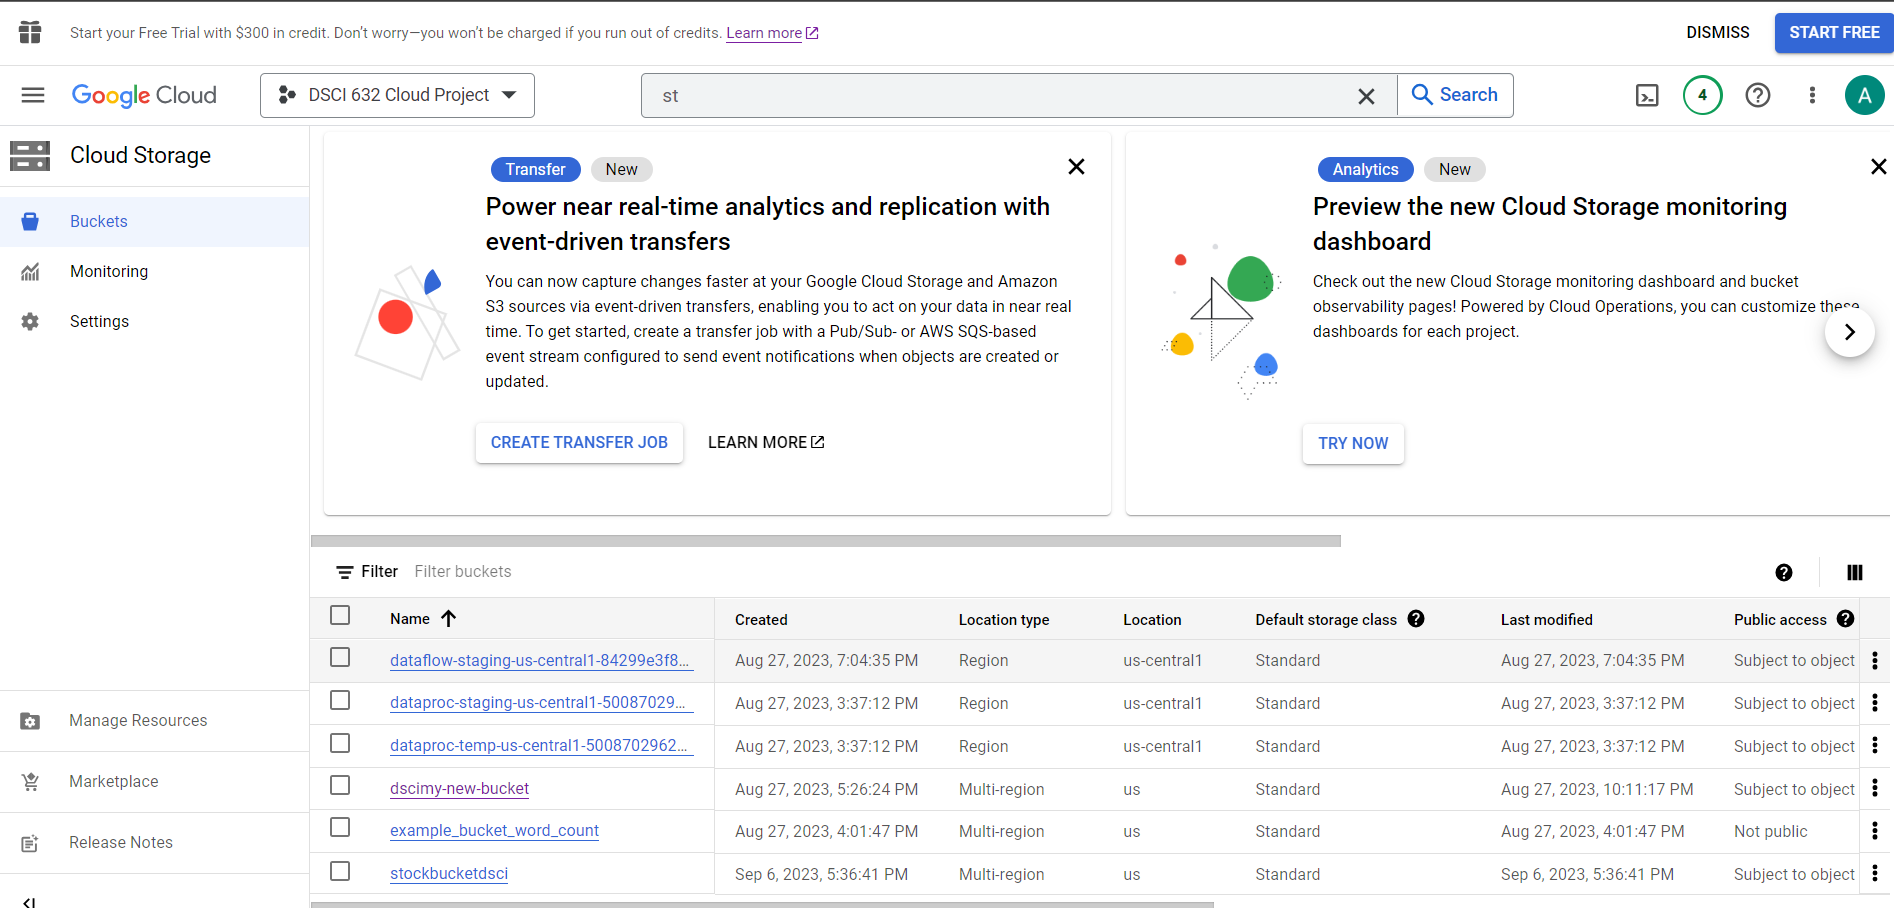

## Clean-Up steps for the GCP resources after use

All the following commands needs to be run in the Google CLI command prompt installed in the system.

In [ ]:
gcloud scheduler jobs delete stockdscijob --location=us-central1-f
gcloud pubsub topics delete stock_topic_id
gsutil -m rm -rf "gs://stockbucketdsci/samples/output*"
gsutil -m rm -rf "gs://stockbucketdsci/temp/*"
gsutil rb gs://stockbucketdsci

gcloud iam service-accounts delete stockacc@dsci-632-cloud-project.iam.gserviceaccount.com

gcloud auth application-default revoke
gcloud auth revoke

The github link to the project can be found [here](https://www.kaggle.com/datasets/deepakjoshi2k/yahoo-stock-prediction-by-news).